# Descriptive Statistics and Data Visualization
This notebook covers exploratory analysis for 430 features<br>
coming from 9 different categories of clinical data<br>
The analysis will include three steps:<br>
1. Extract Descriptive Statistics for each feature
2. Visualize the distribution 
3. Brief Summary of Findings

<br>

| Table Name |variable prefix|columns |DType |Description | 
| :--- | :--- | :--- | :--- | :--- |
| Research Session Attendance|rsa_|25 |Binary|Records attendence for each week of treatment | 
| Demographics|dem_|10 |Categorical|Sex, Ethnicity, Race | 
| Urine Drug Screen| test_|225|Binary  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|dsm_|6|Categorical |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|mdh_|18|Categorical |Tracks medical and psychiatric history of 18 different Conditions| 
| Physical Exam|pex_|12|Categorical |Tracks the appearance and condition of patients for 12 different physical observations| 
| Timeline Follow Back Survey|survey_|70|Numeric |Surveys for self reported drug use, collected every 4 weeks, records total number of instances of drug use for the previous 30 days|
| Dose Record |meds_|50|Numeric |Records the medication, averge weekly dose and week of treatment| 


In [2]:
# convert markdown table to df
import pandas as pd
import sys
from IPython.display import display, HTML, Markdown

def markdown_table_to_df(table):
    rows = table.strip().split('\n')
    header = rows[0].split('|')[1:-1]
    data = [row.split('|')[1:-1] for row in rows[2:]]
    df = pd.DataFrame(data, columns=header)
    return df

table = """| Table Name |variable prefix| Type |Description | 
| :--- | :--- | :--- | :--- |
| Research Session Attendance|rsa_ |Binary|Records attendence for each week of treatment | 
| Demographics|dem_ |Categorical|Sex, Ethnicity, Race | 
| Urine Drug Screen| test_|Binary  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|dsm_|Categorical |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|mdh_|Categorical |Tracks medical and psychiatric history of 18 different Conditions| 
| Physical Exam|pex_|Categorical |Tracks the appearance and condition of patients for 12 different physical observations| 
| Timeline Follow Back Survey|survey_|Numeric |Surveys for self reported drug use, collected every 4 weeks, includes previous 30 days of use ot week 0, 4, 8, 12, 16, 20, 24| 
| Dose Record |meds_|Numeric |Records the medication, averge weekly dose and week of treatment| 
"""

df = markdown_table_to_df(table)

# convert back to markdown and display
display(Markdown(df.to_markdown()))

|    |  Table Name                     | variable prefix   |  Type       | Description                                                                                                                   |
|---:|:--------------------------------|:------------------|:------------|:------------------------------------------------------------------------------------------------------------------------------|
|  0 | Research Session Attendance     | rsa_              | Binary      | Records attendence for each week of treatment                                                                                 |
|  1 | Demographics                    | dem_              | Categorical | Sex, Ethnicity, Race                                                                                                          |
|  2 | Urine Drug Screen               | test_             | Binary      | Drug test for 8 different drug classes, taken weekly for 24 weeks                                                             |
|  3 | DSM-IV Diagnosis                | dsm_              | Categorical | Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines                                       |
|  4 | Medical and Psychiatric History | mdh_              | Categorical | Tracks medical and psychiatric history of 18 different Conditions                                                             |
|  5 | Physical Exam                   | pex_              | Categorical | Tracks the appearance and condition of patients for 12 different physical observations                                        |
|  6 | Timeline Follow Back Survey     | survey_           | Numeric     | Surveys for self reported drug use, collected every 4 weeks, includes previous 30 days of use ot week 0, 4, 8, 12, 16, 20, 24 |
|  7 | Dose Record                     | meds_             | Numeric     | Records the medication, averge weekly dose and week of treatment                                                              |

### Import Required Libraries

In [3]:
import pandas as pd # data manipulation
import numpy as np # numerical computation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # enhanced visualization
import warnings # ignore warnings
import helper # custom data transformation functions
from IPython.display import display, Markdown # display and markdown conversion
import re # regular expressions
warnings.filterwarnings('ignore') # ignore warnings

# Load the data
data = pd.read_csv('../data/merged_data.csv')

# Display the first few rows of the data
data.shape

(1321, 420)

In [4]:
df = data[[col for col in data.columns if 'survey_' in col]]

df.describe()

,survey_cannabis_0,survey_cocaine_0,survey_alcohol_0,survey_oxycodone_0,survey_mmethadone_0,survey_amphetamine_0,survey_methamphetamine_0,survey_opiates_0,survey_benzodiazepines_0,survey_propoxyphene_0,...,survey_cannabis_24,survey_cocaine_24,survey_alcohol_24,survey_oxycodone_24,survey_mmethadone_24,survey_amphetamine_24,survey_methamphetamine_24,survey_opiates_24,survey_benzodiazepines_24,survey_propoxyphene_24
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,...,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,2.793338,3.385314,1.544285,2.666919,1.650265,0.188494,0.393641,24.322483,0.633611,0.007570,...,1.688872,1.347464,0.734292,0.143073,0.102952,0.062074,0.265708,2.214989,0.317941,0.003028
std,7.422355,7.173545,4.790747,7.541273,5.332606,1.585938,2.086629,9.824082,2.762118,0.128877,...,5.664023,4.460561,3.390689,1.423812,1.426481,1.001102,1.983595,7.107345,1.901846,0.086986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,31.000000,31.000000,30.000000,30.000000,30.000000,30.000000,30.000000,32.000000,30.000000,3.000000,...,35.000000,60.000000,54.000000,38.000000,30.000000,26.000000,30.000000,77.000000,31.000000,3.000000


### Review RSA: Research Session Attendence
Research Session Attendance: RSA<br>
Records attendence for 24 weeks of treatment. <br>
Recorded each week<br>

Descriptive statistics for each week of attendence:<br>
- Avg weekly attendance 851 patients per week
- Avg proportion of patients attending weekly 44%
<br>


<br>
We will plot the weekly distribution of percentage of patients attending treatment

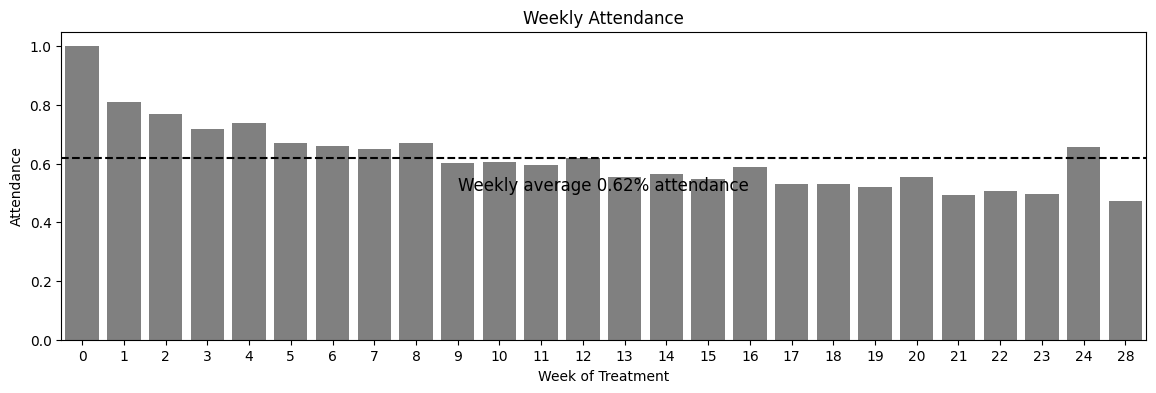

In [5]:
# create df for rsa clinical data
rsa = helper.series_func(data, 'rsa', 'mean')

# set params to plot the data series
series, title, ylabel, xlabel = rsa, 'Weekly Attendance', 'Attendance', 'Week of Treatment'

# call helper function to plot the data series
helper.plot_func(series, title, ylabel, xlabel)
# create bespoke annotation for this table
plt.annotate(
        f"Weekly average {series.mean().round(2)}% attendance",
        xy=(0.5, 0.5),
        xycoords="axes fraction",
        ha="center",
        va="center",
        fontsize=12,
        color="black",
    );

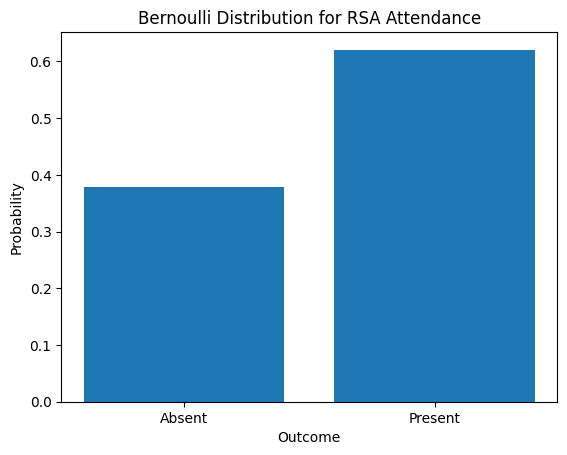

In [6]:
from scipy.stats import bernoulli
# create bernoulli distribtution for rsa

# define probability of success
p = series.mean()

# calculate pmp values for outcomes 0 and 1
pmf_values = bernoulli.pmf([0, 1], p)

# create a figure and axis
plt.bar([0, 1], pmf_values, tick_label=['Absent', 'Present'])
plt.title('Bernoulli Distribution for RSA Attendance')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.show()

### Review Demographic Data
Demographics: DEM<br>
Data includes response to questions about gender, race and ethnicity<br>
Data includes 12 different responses<br>
Data collected at baseline assessment<br>

<br>

|    | column                    | value              |   count |   percentage |
|---:|:--------------------------|:-------------------|--------:|-------------:|
|  0 | dem_gender                | male               |    1283 |         0.67 |
|  1 | dem_gender                | female             |     631 |         0.33 |
|  3 | dem_ethnicity             | not_spanish_origin |    1579 |         0.82 |
|  4 | dem_ethnicity             | spanish_origin     |     328 |         0.17 |
|  7 | dem_race_no_answer        | 1.0                |       5 |         0    |
|  9 | dem_race_unknown          | 1.0                |       8 |         0    |
| 11 | dem_race_amer_ind         | 1.0                |      85 |         0.04 |
| 13 | dem_race_asian            | 1.0                |      29 |         0.02 |
| 15 | dem_race_black            | 1.0                |     233 |         0.12 |
| 17 | dem_race_pacific_islander | 1.0                |      12 |         0.01 |
| 18 | dem_race_white            | 1.0                |    1379 |         0.72 |
| 21 | dem_race_other            | 1.0                |     284 |         0.15 |

In [7]:
# This code creates an efficient table to view value_counts of the demographics data

# create the demographics dataframe
dem = data[[col for col in data.columns if col.startswith('dem_')]]

# call the helper function to extract the value counts and organize them into a table
result_df = helper.df_value_counts(dem)

# remove index row 2, 5 - these have mostly missing values and not useful for analysis
result_df = result_df.drop(result_df.index[[2,5]])

# remove values with 0.0 - these are the negative binary response, not useful for analysis
result_df = result_df[result_df['value'] != 0.0]

# display the table in markdown
display(Markdown(result_df.to_markdown()))


|    | column        | value            |   count |   percentage |
|---:|:--------------|:-----------------|--------:|-------------:|
|  0 | dem_gender    | male             |     891 |         0.67 |
|  1 | dem_gender    | female           |     430 |         0.33 |
|  3 | dem_ethnicity | spanish_origin   |     217 |         0.16 |
|  4 | dem_race      | white            |     957 |         0.72 |
|  6 | dem_race      | black            |     124 |         0.09 |
|  7 | dem_race      | amer_ind         |      53 |         0.04 |
|  8 | dem_race      | asian            |      22 |         0.02 |
|  9 | dem_race      | pacific_islander |       7 |         0.01 |
| 10 | dem_race      | unknown          |       4 |         0    |
| 11 | dem_race      | no_answer        |       2 |         0    |

In [8]:
# separate the data into two groups based on the value
groups = ['gender', 'ethnicity','race']
for dem in groups:
    # create dataframe for each group, for rows that have dem in column
    globals()[dem] = result_df[result_df['column'].str.contains(dem)]
    # sort values by count in descending order
    globals()[dem] = globals()[dem].sort_values(by='count', ascending=False)
    # convert to markdown
    print(dem)
    display(Markdown(globals()[dem].to_markdown()))
    

gender


|    | column     | value   |   count |   percentage |
|---:|:-----------|:--------|--------:|-------------:|
|  0 | dem_gender | male    |     891 |         0.67 |
|  1 | dem_gender | female  |     430 |         0.33 |

ethnicity


|    | column        | value          |   count |   percentage |
|---:|:--------------|:---------------|--------:|-------------:|
|  3 | dem_ethnicity | spanish_origin |     217 |         0.16 |

race


|    | column   | value            |   count |   percentage |
|---:|:---------|:-----------------|--------:|-------------:|
|  4 | dem_race | white            |     957 |         0.72 |
|  6 | dem_race | black            |     124 |         0.09 |
|  7 | dem_race | amer_ind         |      53 |         0.04 |
|  8 | dem_race | asian            |      22 |         0.02 |
|  9 | dem_race | pacific_islander |       7 |         0.01 |
| 10 | dem_race | unknown          |       4 |         0    |
| 11 | dem_race | no_answer        |       2 |         0    |

### Visualize Demographic Data

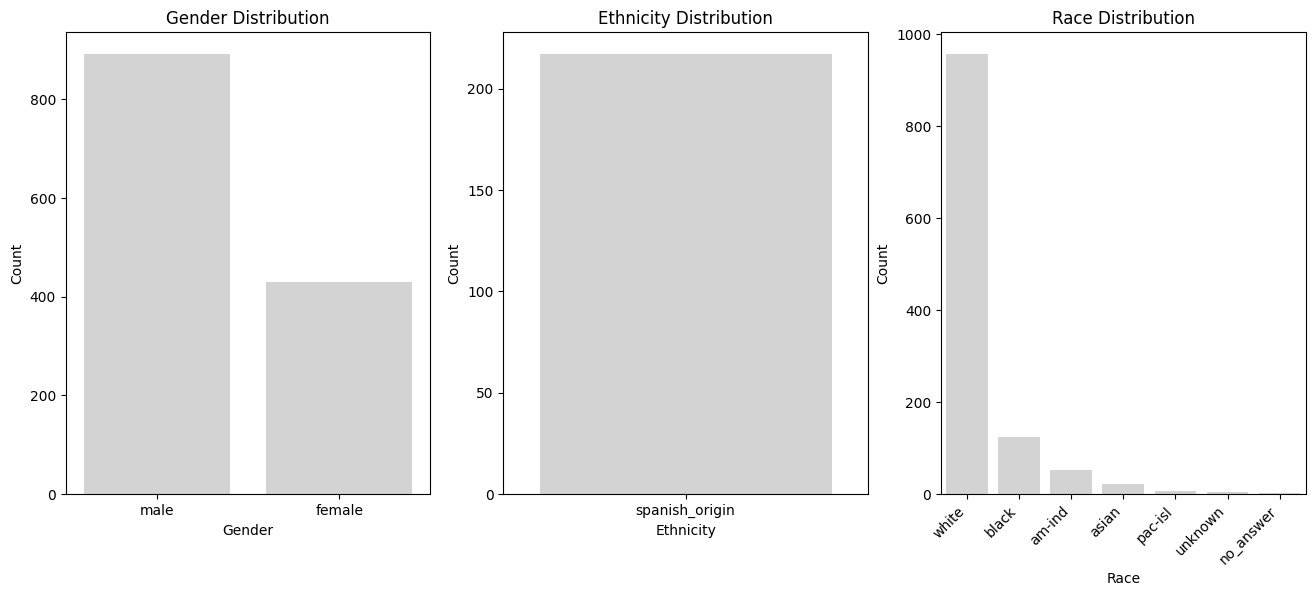

In [9]:
# create 3 subplots together for genger, ethnicity and race dfs
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
for i, dem in enumerate(groups):
    # plot the data
    sns.barplot(data=globals()[dem], x='value', y='count', ax=axes[i], color='lightgray')
    # set the title
    axes[i].set_title(f'{dem.capitalize()} Distribution')
    # set the x label
    axes[i].set_xlabel(f'{dem.capitalize()}')
    # set the y label
    axes[i].set_ylabel('Count')
    # Assuming axes is a collection of matplotlib Axes objects
new_labels = ['white', 'black', 'am-ind', 'asian', 'pac-isl', 'unknown', 'no_answer']
axes[2].set_xticklabels(new_labels, rotation=45, horizontalalignment='right');
# create more space between xlabel and xticklabels


### Review UDS Data
Urine Drug Screen: UDS<br>
Drug test for 8 different drug classes, taken weekly for 24 weeks<br>
<br>

### Key Descriptive Stats
**Mean % positive test rate for each drug class per week**<br>
|       |   pro |   amp |   can |   ben |   mme |   oxy |   coc |   met |   opi |
|:------|------:|------:|------:|------:|------:|------:|------:|------:|------:|
| count | 25    | 25    | 25    | 25    | 25    | 25    | 25    | 25    | 25    |
| mean  |  0.53 |  0.55 |  0.63 |  0.59 |  0.74 |  0.55 |  0.67 |  0.56 |  0.71 |
| std   |  0.12 |  0.11 |  0.09 |  0.1  |  0.11 |  0.1  |  0.07 |  0.11 |  0.04 |
| min   |  0.04 |  0.1  |  0.25 |  0.21 |  0.26 |  0.15 |  0.4  |  0.12 |  0.65 |
| 25%   |  0.52 |  0.54 |  0.62 |  0.58 |  0.74 |  0.53 |  0.66 |  0.55 |  0.69 |
| 50%   |  0.56 |  0.58 |  0.66 |  0.62 |  0.77 |  0.58 |  0.68 |  0.59 |  0.71 |
| 75%   |  0.6  |  0.62 |  0.68 |  0.65 |  0.79 |  0.61 |  0.71 |  0.62 |  0.72 |
| max   |  0.64 |  0.65 |  0.72 |  0.69 |  0.82 |  0.65 |  0.73 |  0.66 |  0.85 |

**Mean count of positive tests for each drug class per week**<br>
|       |     pro |     amp |     can |     ben |     mme |     oxy |     coc |     met |     opi |
|:------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
| count |   25    |   25    |   25    |   25    |   25    |   25    |   25    |   25    |   25    |
| mean  | 1020.64 | 1061.4  | 1213.2  | 1138.48 | 1428.56 | 1052.52 | 1280.08 | 1073.6  | 1357.8  |
| std   |  231.7  |  216.64 |  180.57 |  192.47 |  214.07 |  199.41 |  135.54 |  212.59 |   77.19 |
| min   |   83    |  190    |  480    |  403    |  491    |  282    |  762    |  223    | 1238    |
| 25%   |  996    | 1039    | 1193    | 1107    | 1424    | 1023    | 1257    | 1050    | 1314    |
| 50%   | 1080    | 1115    | 1262    | 1192    | 1483    | 1105    | 1309    | 1124    | 1360    |
| 75%   | 1147    | 1182    | 1306    | 1254    | 1521    | 1166    | 1361    | 1188    | 1380    |
| max   | 1223    | 1254    | 1371    | 1315    | 1576    | 1239    | 1407    | 1267    | 1638    |

### Data Visualization
This data is very complex, where we will have to pre-process the data<br>
to get meaningful visualizations.<br>
<br>
We will take the following steps to visual patient test data during treatment.
1. Create a test dataframe: Will contain 227 columns, representing 9 drug tests<br>
taken every week for 24 weeks.
2. Extract relevant text fields from the dataset for plotting
3. Create a plot dataframe that has a series with the % test rate for each drug<br>
4. Creat a workflow to automate plot rendering for 9 drug tests
5. Plot will be annotated with key insights to help the user learn them immediately<br>




Series created for each drug class:
pro created with shape of: (25, 1)
amp created with shape of: (25, 1)
can created with shape of: (25, 1)
ben created with shape of: (25, 1)
mme created with shape of: (25, 1)
oxy created with shape of: (25, 1)
coc created with shape of: (25, 1)
met created with shape of: (25, 1)
opi created with shape of: (25, 1)
Series created for each drug class:

drug_tests Dataframe:  Positive test rate per drug class


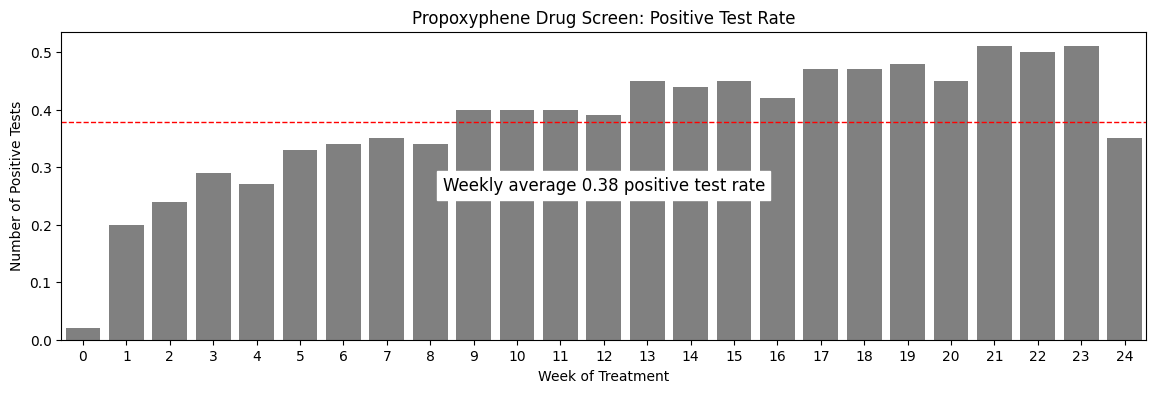

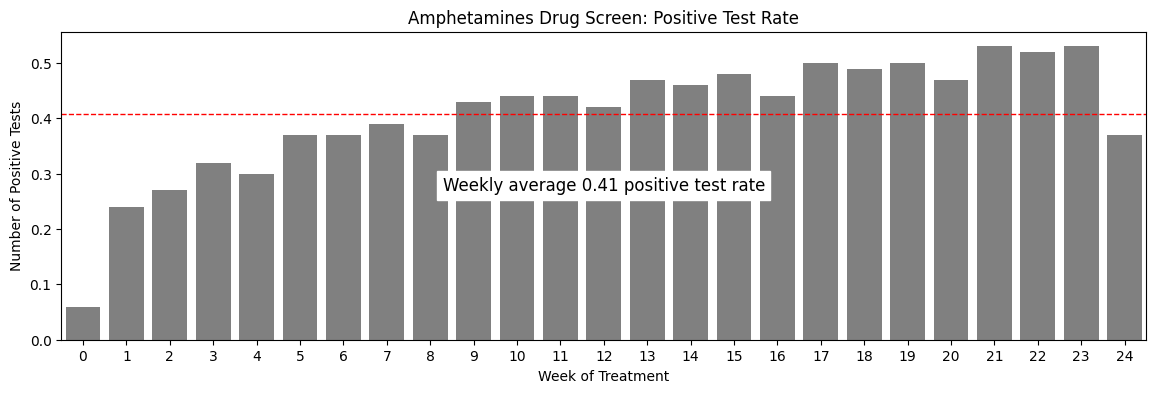

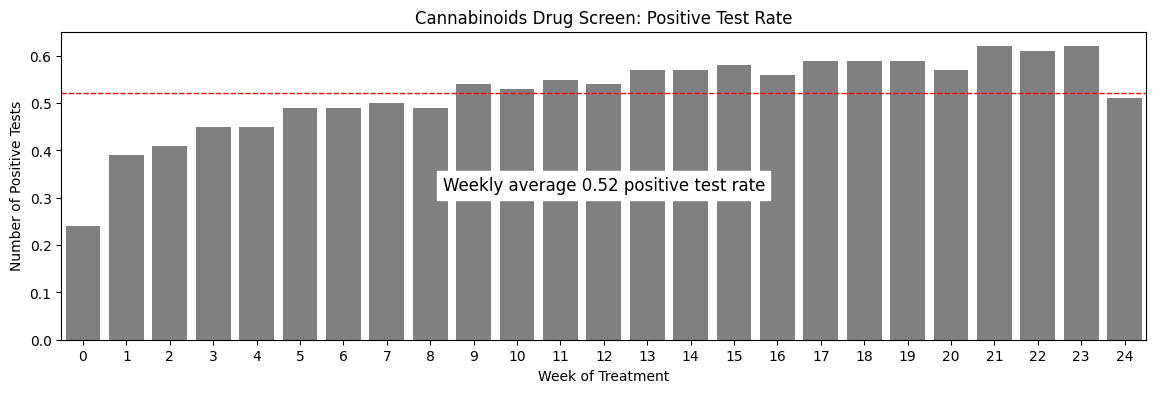

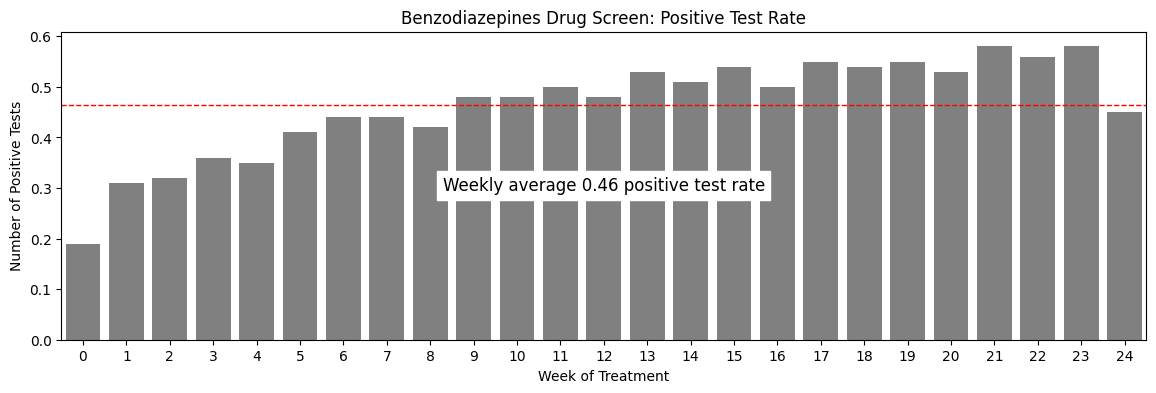

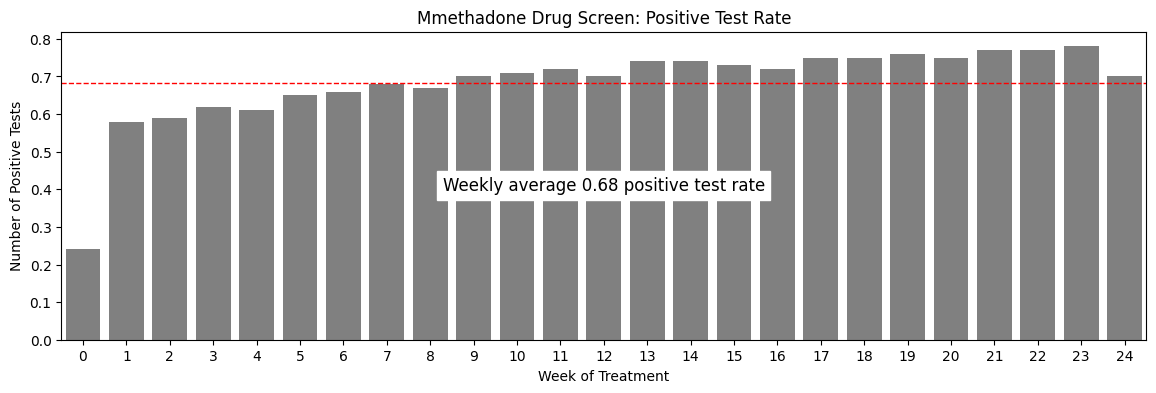

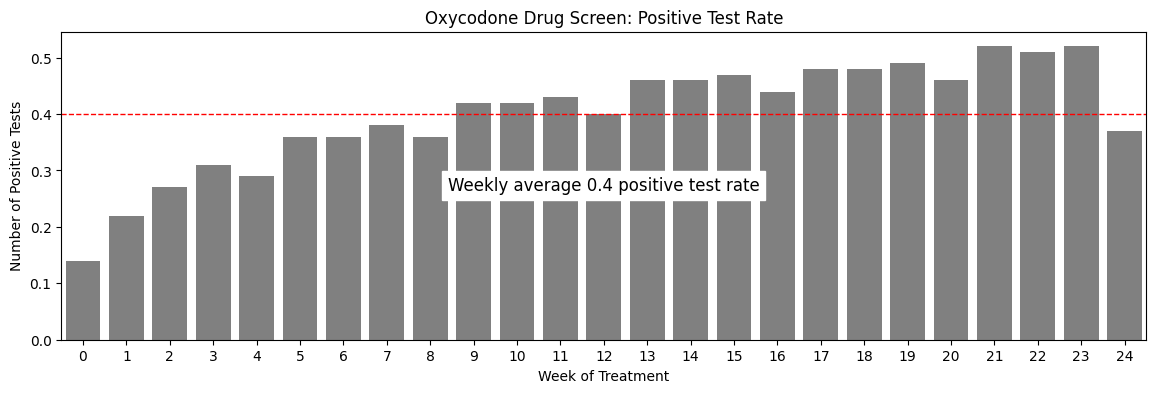

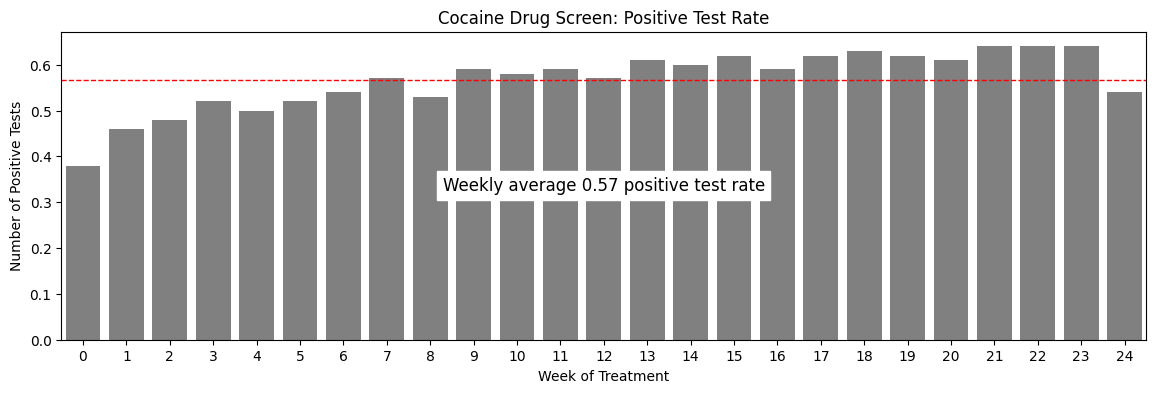

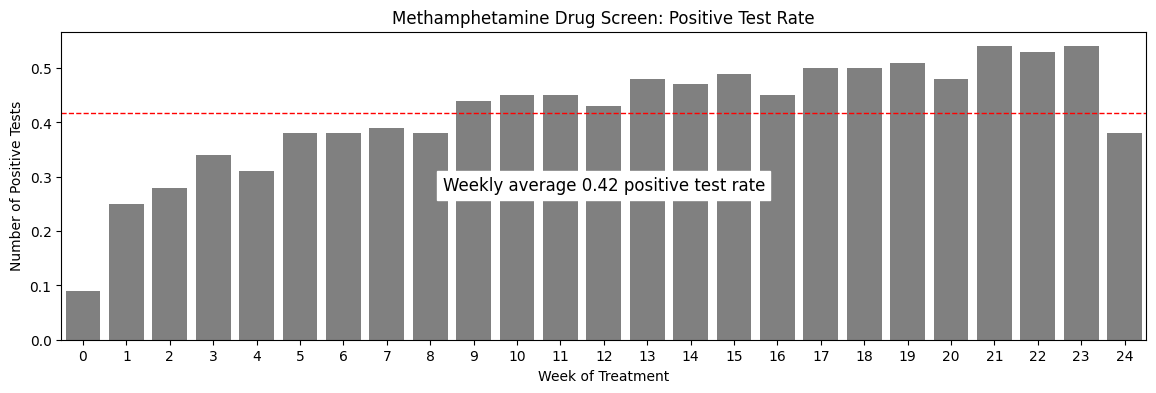

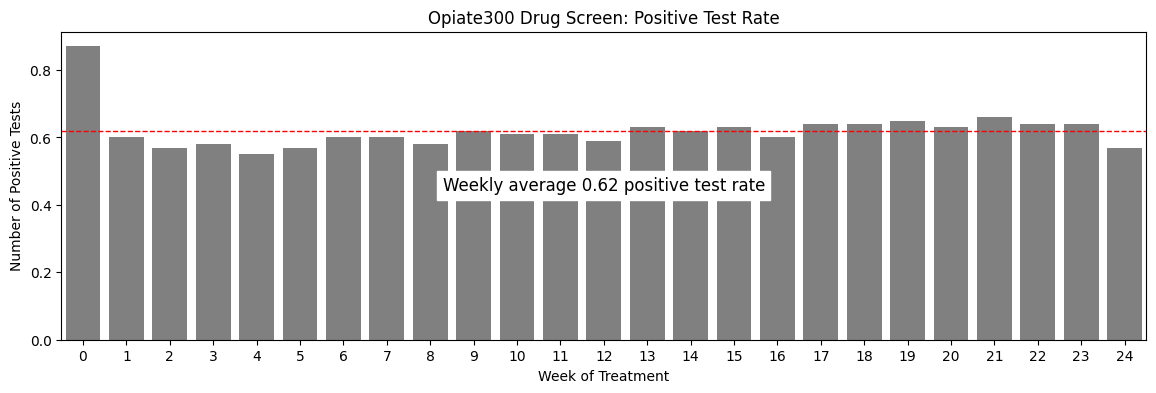

In [10]:
test_df, drug_dict = helper.agg_weekly_data(data, group='test_', agg='mean')

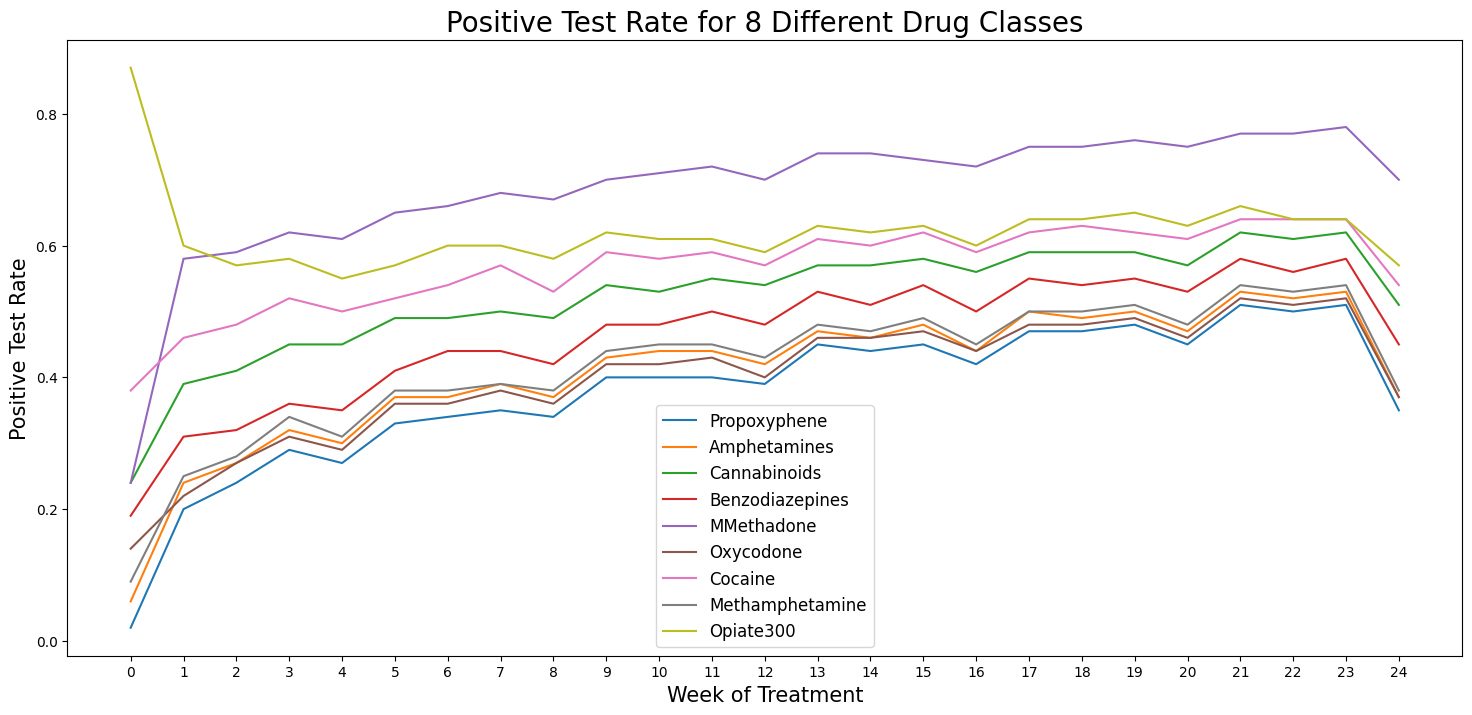

In [11]:
# create line plot for test df
#test_df.plot(title='Positive Test Rate for 8 Different Drug Classes', xlabel='Week of Treatment', ylabel='Positive Test Rate', figsize=(15, 5))
plt.figure(figsize=(18, 8))
for col in test_df.columns:
    plt.plot(test_df[col], label=drug_dict[col])
# show legend outside of plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# show every week of treatment for x axis
plt.xticks(np.arange(0, 25, 1));
plt.title('Positive Test Rate for 8 Different Drug Classes', fontsize=20)
plt.xlabel('Week of Treatment', fontsize=15)
plt.ylabel('Positive Test Rate', fontsize=15)
# make legend font larger
plt.legend(fontsize=12)
plt.show()


### Create a Markdown Table with Descriptive Statistics
- We will cover both the positive test rate and count of positive tests<br>

In [12]:
# create descriptive stats for drug tests
drug_tests_pos_count = test_df.describe().round(2)

# convert to markdown for portability
drug_tests_pos_count.to_markdown()

# display markdown table through ipython display
display(Markdown(drug_tests_pos_count.to_markdown()))

|       |   pro |   amp |   can |   ben |   mme |   oxy |   coc |   met |   opi |
|:------|------:|------:|------:|------:|------:|------:|------:|------:|------:|
| count | 25    | 25    | 25    | 25    | 25    | 25    | 25    | 25    | 25    |
| mean  |  0.38 |  0.41 |  0.52 |  0.46 |  0.68 |  0.4  |  0.57 |  0.42 |  0.62 |
| std   |  0.11 |  0.11 |  0.09 |  0.1  |  0.11 |  0.1  |  0.06 |  0.1  |  0.06 |
| min   |  0.02 |  0.06 |  0.24 |  0.19 |  0.24 |  0.14 |  0.38 |  0.09 |  0.55 |
| 25%   |  0.34 |  0.37 |  0.49 |  0.42 |  0.66 |  0.36 |  0.53 |  0.38 |  0.59 |
| 50%   |  0.4  |  0.44 |  0.54 |  0.48 |  0.71 |  0.42 |  0.59 |  0.45 |  0.61 |
| 75%   |  0.45 |  0.48 |  0.58 |  0.54 |  0.75 |  0.47 |  0.62 |  0.49 |  0.64 |
| max   |  0.51 |  0.53 |  0.62 |  0.58 |  0.78 |  0.52 |  0.64 |  0.54 |  0.87 |

### Review DSM Data
DSM provides the guidlines for diagnosing mental illness.<br>
DSM diagnosis is collected at baseline assesment<br>
The patient can have 3 different values for diagnosis for 6 drug classes:<br>
- Abuse
- Dependence
- No Diagnosis

<br>
The tables will be grouped by diagnosis to produce insights to the reader immediately<br>
<br>

**Abuse**
|    | column          | value   |   count |   percentage |
|---:|:----------------|:--------|--------:|-------------:|
| 21 | dsm_alcohol     | abuse   |     262 |         0.14 |
|  2 | dsm_cannabis    | abuse   |     218 |         0.11 |
|  8 | dsm_cocaine     | abuse   |     185 |         0.1  |
| 12 | dsm_sedative    | abuse   |     123 |         0.06 |
| 26 | dsm_amphetamine | abuse   |     109 |         0.06 |
| 18 | dsm_opiates     | abuse   |       1 |         0    |

**Dependence**
|    | column          | value      |   count |   percentage |
|---:|:----------------|:-----------|--------:|-------------:|
| 15 | dsm_opiates     | dependence |    1486 |         0.78 |
|  7 | dsm_cocaine     | dependence |     305 |         0.16 |
| 22 | dsm_alcohol     | dependence |     102 |         0.05 |
| 13 | dsm_sedative    | dependence |      90 |         0.05 |
|  3 | dsm_cannabis    | dependence |      73 |         0.04 |
| 27 | dsm_amphetamine | dependence |      67 |         0.03 |

**No Diagnosis**
 |    | column          | value        |   count |   percentage |
|---:|:----------------|:-------------|--------:|-------------:|
| 24 | dsm_amphetamine | no_diagnosis |    1311 |         0.68 |
| 10 | dsm_sedative    | no_diagnosis |    1274 |         0.66 |
|  0 | dsm_cannabis    | no_diagnosis |    1196 |         0.62 |
| 19 | dsm_alcohol     | no_diagnosis |    1123 |         0.59 |
|  5 | dsm_cocaine     | no_diagnosis |     997 |         0.52 |

In [13]:
# This is the code that creates the markdown table above

# get the columns for the dsm data
dsm = data[[col for col in data.columns if col.startswith('dsm_')]]

# call helper function to extract the value counts and organize them into a table
dsm_vc = helper.df_value_counts(dsm)

# convert to markdown
dsm_vc.to_markdown()

# display markdown table through ipython display
display(Markdown(dsm_vc.to_markdown()))


|    | column          | value         |   count |   percentage |
|---:|:----------------|:--------------|--------:|-------------:|
|  0 | dsm_cannabis    | no_diagnosis  |     898 |         0.68 |
|  1 | dsm_cannabis    | not_present   |     189 |         0.14 |
|  2 | dsm_cannabis    | abuse         |     171 |         0.13 |
|  3 | dsm_cannabis    | dependence    |      59 |         0.04 |
|  4 | dsm_cannabis    | not_evaluated |       4 |         0    |
|  5 | dsm_cocaine     | no_diagnosis  |     757 |         0.57 |
|  6 | dsm_cocaine     | dependence    |     223 |         0.17 |
|  7 | dsm_cocaine     | not_present   |     189 |         0.14 |
|  8 | dsm_cocaine     | abuse         |     148 |         0.11 |
|  9 | dsm_cocaine     | not_evaluated |       4 |         0    |
| 10 | dsm_sedative    | no_diagnosis  |     966 |         0.73 |
| 11 | dsm_sedative    | not_present   |     189 |         0.14 |
| 12 | dsm_sedative    | abuse         |     102 |         0.08 |
| 13 | dsm_sedative    | dependence    |      60 |         0.05 |
| 14 | dsm_sedative    | not_evaluated |       4 |         0    |
| 15 | dsm_opiates     | dependence    |    1128 |         0.85 |
| 16 | dsm_opiates     | not_present   |     189 |         0.14 |
| 17 | dsm_opiates     | not_evaluated |       4 |         0    |
| 18 | dsm_alcohol     | no_diagnosis  |     865 |         0.65 |
| 19 | dsm_alcohol     | abuse         |     197 |         0.15 |
| 20 | dsm_alcohol     | not_present   |     189 |         0.14 |
| 21 | dsm_alcohol     | dependence    |      66 |         0.05 |
| 22 | dsm_alcohol     | not_evaluated |       4 |         0    |
| 23 | dsm_amphetamine | no_diagnosis  |    1004 |         0.76 |
| 24 | dsm_amphetamine | not_present   |     189 |         0.14 |
| 25 | dsm_amphetamine | abuse         |      84 |         0.06 |
| 26 | dsm_amphetamine | dependence    |      40 |         0.03 |
| 27 | dsm_amphetamine | not_evaluated |       4 |         0    |

In [14]:
# reogroup the data into three tables to make it easier to read

# create list of group, each group will be a separate table
diagnosis = ['abuse', 'dependence', 'no_diagnosis']

# iterate through each diagnosis
for disorder in diagnosis:
    # create a dataframe for each disorder
    globals()[disorder] = dsm_vc[dsm_vc['value']==disorder]
    # sort values by count in descending order
    globals()[disorder] = globals()[disorder].sort_values(by='count', ascending=False)
    # convert to markdown
    globals()[disorder].to_markdown()
    # print the disorder before the ipython display
    print(disorder)
    display(Markdown(globals()[disorder].to_markdown()))

# save each variable to csv
for disorder in diagnosis:
    globals()[disorder].to_csv(f'../data/dsm/{disorder}.csv', index=False)
    

abuse


|    | column          | value   |   count |   percentage |
|---:|:----------------|:--------|--------:|-------------:|
| 19 | dsm_alcohol     | abuse   |     197 |         0.15 |
|  2 | dsm_cannabis    | abuse   |     171 |         0.13 |
|  8 | dsm_cocaine     | abuse   |     148 |         0.11 |
| 12 | dsm_sedative    | abuse   |     102 |         0.08 |
| 25 | dsm_amphetamine | abuse   |      84 |         0.06 |

dependence


|    | column          | value      |   count |   percentage |
|---:|:----------------|:-----------|--------:|-------------:|
| 15 | dsm_opiates     | dependence |    1128 |         0.85 |
|  6 | dsm_cocaine     | dependence |     223 |         0.17 |
| 21 | dsm_alcohol     | dependence |      66 |         0.05 |
| 13 | dsm_sedative    | dependence |      60 |         0.05 |
|  3 | dsm_cannabis    | dependence |      59 |         0.04 |
| 26 | dsm_amphetamine | dependence |      40 |         0.03 |

no_diagnosis


|    | column          | value        |   count |   percentage |
|---:|:----------------|:-------------|--------:|-------------:|
| 23 | dsm_amphetamine | no_diagnosis |    1004 |         0.76 |
| 10 | dsm_sedative    | no_diagnosis |     966 |         0.73 |
|  0 | dsm_cannabis    | no_diagnosis |     898 |         0.68 |
| 18 | dsm_alcohol     | no_diagnosis |     865 |         0.65 |
|  5 | dsm_cocaine     | no_diagnosis |     757 |         0.57 |

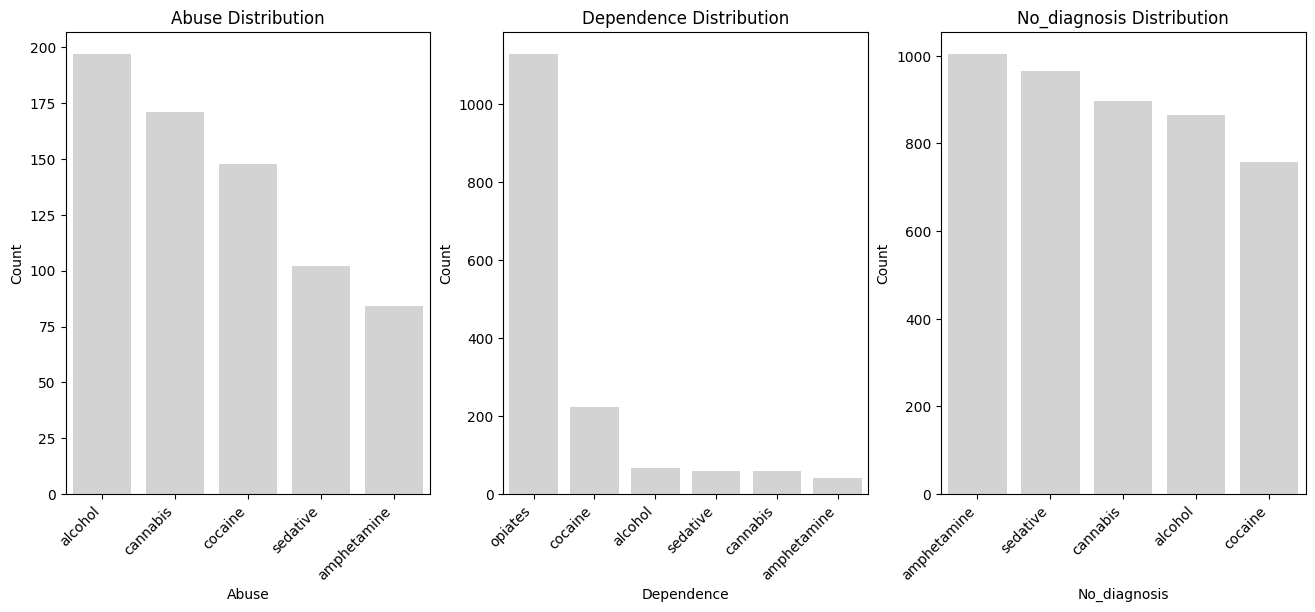

In [15]:
# create 3 plots next to each other for abuse, dependence and no diagnosis
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
for i, disorder in enumerate(diagnosis):
    # plot the data
    sns.barplot(data=globals()[disorder], x='column', y='count', ax=axes[i], color='lightgray')
    # set the title
    axes[i].set_title(f'{disorder.capitalize()} Distribution')
    # set the x label
    axes[i].set_xlabel(f'{disorder.capitalize()}')
    # set the y label
    axes[i].set_ylabel('Count')
    # Assuming axes is a collection of matplotlib Axes objects
    # remove 'dsm_' from xticklabels and rotate 45 degrees
    new_labels = [re.sub('dsm_', '', label) for label in globals()[disorder]['column']]
    axes[i].set_xticklabels(new_labels, rotation=45, horizontalalignment='right');
# create more space between xlabel and xticklabels


### Review MDH: Medical and Psychiatric History Data
Medical and Psychiatric History: MDH<br>
Tracks medical and psychiatric history of 18 different Conditions<br>
With 3 possible responses for each condition:<br>
<br>

### Descriptive Statistics
There are 54 features to evaluate.<br>
Please contiue to scroll to review statistics for each patient history group<br>

In [16]:
# create a new dataframe for the mdh data
mdh = data[[col for col in data.columns if col.startswith('mdh_')]]

# call helper function to extract the value counts and organize them into a table
mdh_vc = helper.df_value_counts(mdh)

# convert to markdown
mdh_vc.to_markdown()

print('mdh dataset shape:',mdh_vc.shape)
display(Markdown(mdh_vc.to_markdown()))

mdh dataset shape: (54, 4)


|    | column                        | value         |   count |   percentage |
|---:|:------------------------------|:--------------|--------:|-------------:|
|  0 | mdh_liver_problems            | no_history    |     888 |         0.67 |
|  1 | mdh_liver_problems            | yes_history   |     418 |         0.32 |
|  2 | mdh_liver_problems            | not_evaluated |      15 |         0.01 |
|  3 | mdh_kidney_problems           | no_history    |    1213 |         0.92 |
|  4 | mdh_kidney_problems           | yes_history   |      95 |         0.07 |
|  5 | mdh_kidney_problems           | not_evaluated |      13 |         0.01 |
|  6 | mdh_alc_withdrawal            | no_history    |    1209 |         0.92 |
|  7 | mdh_alc_withdrawal            | yes_history   |      98 |         0.07 |
|  8 | mdh_alc_withdrawal            | not_evaluated |      14 |         0.01 |
|  9 | mdh_schizophrenia             | no_history    |    1274 |         0.96 |
| 10 | mdh_schizophrenia             | yes_history   |      33 |         0.02 |
| 11 | mdh_schizophrenia             | not_evaluated |      14 |         0.01 |
| 12 | mdh_major_depressive_disorder | no_history    |     948 |         0.72 |
| 13 | mdh_major_depressive_disorder | yes_history   |     360 |         0.27 |
| 14 | mdh_major_depressive_disorder | not_evaluated |      13 |         0.01 |
| 15 | mdh_bipolar_disorder          | no_history    |    1159 |         0.88 |
| 16 | mdh_bipolar_disorder          | yes_history   |     148 |         0.11 |
| 17 | mdh_bipolar_disorder          | not_evaluated |      14 |         0.01 |
| 18 | mdh_anxiety_disorder          | no_history    |     912 |         0.69 |
| 19 | mdh_anxiety_disorder          | yes_history   |     395 |         0.3  |
| 20 | mdh_anxiety_disorder          | not_evaluated |      14 |         0.01 |
| 21 | mdh_sig_neurological_damage   | no_history    |    1184 |         0.9  |
| 22 | mdh_sig_neurological_damage   | yes_history   |     121 |         0.09 |
| 23 | mdh_sig_neurological_damage   | not_evaluated |      16 |         0.01 |
| 24 | mdh_allergies                 | no_history    |     942 |         0.71 |
| 25 | mdh_allergies                 | yes_history   |     366 |         0.28 |
| 26 | mdh_allergies                 | not_evaluated |      13 |         0.01 |
| 27 | mdh_gi_problems               | no_history    |    1012 |         0.77 |
| 28 | mdh_gi_problems               | yes_history   |     295 |         0.22 |
| 29 | mdh_gi_problems               | not_evaluated |      14 |         0.01 |
| 30 | mdh_thyroid_problems          | no_history    |    1271 |         0.96 |
| 31 | mdh_thyroid_problems          | yes_history   |      37 |         0.03 |
| 32 | mdh_thyroid_problems          | not_evaluated |      13 |         0.01 |
| 33 | mdh_heart_condition           | no_history    |    1213 |         0.92 |
| 34 | mdh_heart_condition           | yes_history   |      94 |         0.07 |
| 35 | mdh_heart_condition           | not_evaluated |      14 |         0.01 |
| 36 | mdh_asthma                    | no_history    |    1120 |         0.85 |
| 37 | mdh_asthma                    | yes_history   |     188 |         0.14 |
| 38 | mdh_asthma                    | not_evaluated |      13 |         0.01 |
| 39 | mdh_hypertension              | no_history    |    1151 |         0.87 |
| 40 | mdh_hypertension              | yes_history   |     156 |         0.12 |
| 41 | mdh_hypertension              | not_evaluated |      14 |         0.01 |
| 42 | mdh_skin_disease              | no_history    |    1078 |         0.82 |
| 43 | mdh_skin_disease              | yes_history   |     230 |         0.17 |
| 44 | mdh_skin_disease              | not_evaluated |      13 |         0.01 |
| 45 | mdh_head_injury               | no_history    |     969 |         0.73 |
| 46 | mdh_head_injury               | yes_history   |     338 |         0.26 |
| 47 | mdh_head_injury               | not_evaluated |      14 |         0.01 |
| 48 | mdh_opi_withdrawal            | yes_history   |    1096 |         0.83 |
| 49 | mdh_opi_withdrawal            | no_history    |     211 |         0.16 |
| 50 | mdh_opi_withdrawal            | not_evaluated |      14 |         0.01 |
| 51 | mdh_epilepsy                  | no_history    |    1266 |         0.96 |
| 52 | mdh_epilepsy                  | yes_history   |      42 |         0.03 |
| 53 | mdh_epilepsy                  | not_evaluated |      13 |         0.01 |

### Improve Readability
We will improve readability by breaking the data into 3 tables<br>
1. Patient Has History of Condition
2. Patient Does Not Have History of Condition
3. Patient Was Not Evaluated

In [17]:
# create list of group, each group will be a separate table
patient_history = ['yes_history', 'no_history', 'not_evaluated']

# iterate through each medical history group
for history in patient_history:
    # create a dataframe for each history group
    globals()[history] = mdh_vc[mdh_vc['value']==history]
    # convert to markdown
    globals()[history].to_markdown()
    # sort values by count in descending order
    globals()[history] = globals()[history].sort_values(by='count', ascending=False)

    # print the history group before the ipython display
    print(history)
    display(Markdown(globals()[history].to_markdown()))


yes_history


|    | column                        | value       |   count |   percentage |
|---:|:------------------------------|:------------|--------:|-------------:|
| 48 | mdh_opi_withdrawal            | yes_history |    1096 |         0.83 |
|  1 | mdh_liver_problems            | yes_history |     418 |         0.32 |
| 19 | mdh_anxiety_disorder          | yes_history |     395 |         0.3  |
| 25 | mdh_allergies                 | yes_history |     366 |         0.28 |
| 13 | mdh_major_depressive_disorder | yes_history |     360 |         0.27 |
| 46 | mdh_head_injury               | yes_history |     338 |         0.26 |
| 28 | mdh_gi_problems               | yes_history |     295 |         0.22 |
| 43 | mdh_skin_disease              | yes_history |     230 |         0.17 |
| 37 | mdh_asthma                    | yes_history |     188 |         0.14 |
| 40 | mdh_hypertension              | yes_history |     156 |         0.12 |
| 16 | mdh_bipolar_disorder          | yes_history |     148 |         0.11 |
| 22 | mdh_sig_neurological_damage   | yes_history |     121 |         0.09 |
|  7 | mdh_alc_withdrawal            | yes_history |      98 |         0.07 |
|  4 | mdh_kidney_problems           | yes_history |      95 |         0.07 |
| 34 | mdh_heart_condition           | yes_history |      94 |         0.07 |
| 52 | mdh_epilepsy                  | yes_history |      42 |         0.03 |
| 31 | mdh_thyroid_problems          | yes_history |      37 |         0.03 |
| 10 | mdh_schizophrenia             | yes_history |      33 |         0.02 |

no_history


|    | column                        | value      |   count |   percentage |
|---:|:------------------------------|:-----------|--------:|-------------:|
|  9 | mdh_schizophrenia             | no_history |    1274 |         0.96 |
| 30 | mdh_thyroid_problems          | no_history |    1271 |         0.96 |
| 51 | mdh_epilepsy                  | no_history |    1266 |         0.96 |
| 33 | mdh_heart_condition           | no_history |    1213 |         0.92 |
|  3 | mdh_kidney_problems           | no_history |    1213 |         0.92 |
|  6 | mdh_alc_withdrawal            | no_history |    1209 |         0.92 |
| 21 | mdh_sig_neurological_damage   | no_history |    1184 |         0.9  |
| 15 | mdh_bipolar_disorder          | no_history |    1159 |         0.88 |
| 39 | mdh_hypertension              | no_history |    1151 |         0.87 |
| 36 | mdh_asthma                    | no_history |    1120 |         0.85 |
| 42 | mdh_skin_disease              | no_history |    1078 |         0.82 |
| 27 | mdh_gi_problems               | no_history |    1012 |         0.77 |
| 45 | mdh_head_injury               | no_history |     969 |         0.73 |
| 12 | mdh_major_depressive_disorder | no_history |     948 |         0.72 |
| 24 | mdh_allergies                 | no_history |     942 |         0.71 |
| 18 | mdh_anxiety_disorder          | no_history |     912 |         0.69 |
|  0 | mdh_liver_problems            | no_history |     888 |         0.67 |
| 49 | mdh_opi_withdrawal            | no_history |     211 |         0.16 |

not_evaluated


|    | column                        | value         |   count |   percentage |
|---:|:------------------------------|:--------------|--------:|-------------:|
| 23 | mdh_sig_neurological_damage   | not_evaluated |      16 |         0.01 |
|  2 | mdh_liver_problems            | not_evaluated |      15 |         0.01 |
| 50 | mdh_opi_withdrawal            | not_evaluated |      14 |         0.01 |
| 47 | mdh_head_injury               | not_evaluated |      14 |         0.01 |
| 41 | mdh_hypertension              | not_evaluated |      14 |         0.01 |
| 35 | mdh_heart_condition           | not_evaluated |      14 |         0.01 |
| 29 | mdh_gi_problems               | not_evaluated |      14 |         0.01 |
| 20 | mdh_anxiety_disorder          | not_evaluated |      14 |         0.01 |
| 17 | mdh_bipolar_disorder          | not_evaluated |      14 |         0.01 |
| 11 | mdh_schizophrenia             | not_evaluated |      14 |         0.01 |
|  8 | mdh_alc_withdrawal            | not_evaluated |      14 |         0.01 |
| 26 | mdh_allergies                 | not_evaluated |      13 |         0.01 |
|  5 | mdh_kidney_problems           | not_evaluated |      13 |         0.01 |
| 32 | mdh_thyroid_problems          | not_evaluated |      13 |         0.01 |
| 38 | mdh_asthma                    | not_evaluated |      13 |         0.01 |
| 14 | mdh_major_depressive_disorder | not_evaluated |      13 |         0.01 |
| 44 | mdh_skin_disease              | not_evaluated |      13 |         0.01 |
| 53 | mdh_epilepsy                  | not_evaluated |      13 |         0.01 |

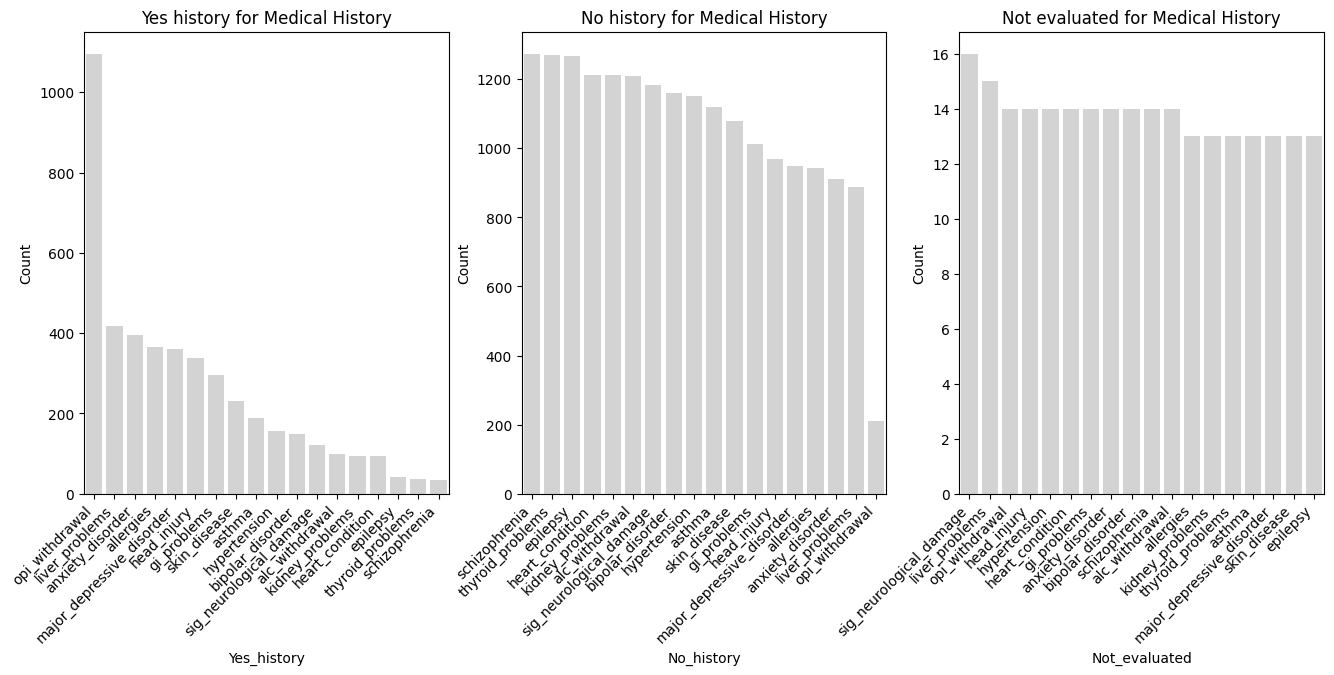

In [31]:
# create 3 plots next to each other for yes, no and not evaluated
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
for i, history in enumerate(patient_history):
    # plot the data
    sns.barplot(data=globals()[history], x='column', y='count', ax=axes[i], color='lightgray')
    # set the title
    axes[i].set_title(f'{history.capitalize().replace("_", " ")} for Medical History')
    # set the x label
    axes[i].set_xlabel(f'{history.capitalize()}')
    # set the y label
    axes[i].set_ylabel('Count')
    # Assuming axes is a collection of matplotlib Axes objects
    # remove 'mdh_' from xticklabels and rotate 45 degrees
    new_labels = [re.sub('mdh_', '', label) for label in globals()[history]['column']]
    axes[i].set_xticklabels(new_labels, rotation=45, horizontalalignment='right');



### Create Visualization
Use the column (feature) name as x, with either count or percent as y<br>
Visualize the 3 different values as hue in a bar plot<br>

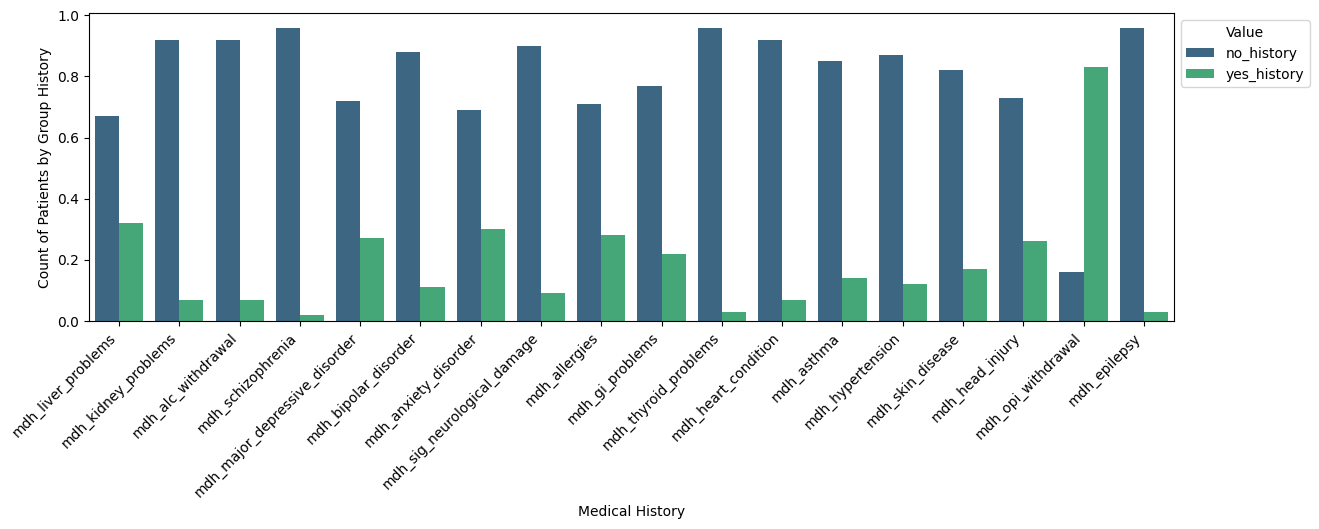

In [13]:
# filter df to remove not_evaluated group, as there is no variability in the data
filtered_df = mdh_vc[mdh_vc['value'].isin(['yes_history', 'no_history'])]

# visualize mdh_vc table
plt.figure(figsize=(14, 4))
sns.barplot(x='column', y='percentage', data=filtered_df, hue='value', palette='viridis')
plt.xticks(rotation=45, ha='right');
# move legend outside of plot
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Value')
plt.ylabel('Count of Patients by Group History')
plt.xlabel('Medical History');

### Review PEX: Physical Exam Data
Physical Exam: PEX<br>
Tracks the appearance and condition of patients for 12 different physical observations<br>
<br>


In [14]:
# create pex table with value counts

# create df for pex data
pex = data[[col for col in data.columns if col.startswith('pex_')]]

# call helper function to extract the value counts and organize them into a table
pex_vc = helper.df_value_counts(pex)

pex_vc


,column,value,count,percentage
0,pex_lymph_nodes,normal,1252,0.95
1,pex_lymph_nodes,abnormal,47,0.04
2,pex_lymph_nodes,not_present,13,0.01
3,pex_lymph_nodes,not_evaluated,9,0.01
4,pex_other,not_present,719,0.54
5,pex_other,not_evaluated,509,0.39
6,pex_other,normal,52,0.04
7,pex_other,abnormal,41,0.03
8,pex_respiratory,normal,1203,0.91
9,pex_respiratory,abnormal,99,0.07


In [15]:

# create groups for evaluation status
evaluation = ['abnormal', 'normal', 'not_evaluated']

# iterate through each evaluation group
for status in evaluation:
    # create a dataframe for each evaluation group
    globals()[status] = pex_vc[pex_vc['value']==status]
    # convert to markdown
    globals()[status].to_markdown()
    # sort values by count in descending order
    globals()[status] = globals()[status].sort_values(by='count', ascending=False)
    # print the evaluation group before the ipython display
    print(status)
    display(Markdown(globals()[status].to_markdown()))


abnormal


|    | column               | value    |   count |   percentage |
|---:|:---------------------|:---------|--------:|-------------:|
| 44 | pex_skin             | abnormal |     683 |         0.52 |
| 33 | pex_ears_nose_throat | abnormal |     440 |         0.33 |
| 17 | pex_gi_system        | abnormal |     267 |         0.2  |
| 29 | pex_gen_appearance   | abnormal |     231 |         0.17 |
| 21 | pex_extremeties      | abnormal |     155 |         0.12 |
|  9 | pex_respiratory      | abnormal |      99 |         0.07 |
| 13 | pex_musculoskeletal  | abnormal |      89 |         0.07 |
| 37 | pex_head_neck        | abnormal |      73 |         0.06 |
| 41 | pex_cardio           | abnormal |      70 |         0.05 |
|  1 | pex_lymph_nodes      | abnormal |      47 |         0.04 |
| 25 | pex_neurological     | abnormal |      47 |         0.04 |
|  7 | pex_other            | abnormal |      41 |         0.03 |

normal


|    | column               | value   |   count |   percentage |
|---:|:---------------------|:--------|--------:|-------------:|
| 24 | pex_neurological     | normal  |    1253 |         0.95 |
|  0 | pex_lymph_nodes      | normal  |    1252 |         0.95 |
| 40 | pex_cardio           | normal  |    1231 |         0.93 |
| 36 | pex_head_neck        | normal  |    1228 |         0.93 |
| 12 | pex_musculoskeletal  | normal  |    1212 |         0.92 |
|  8 | pex_respiratory      | normal  |    1203 |         0.91 |
| 20 | pex_extremeties      | normal  |    1146 |         0.87 |
| 28 | pex_gen_appearance   | normal  |    1073 |         0.81 |
| 16 | pex_gi_system        | normal  |    1033 |         0.78 |
| 32 | pex_ears_nose_throat | normal  |     861 |         0.65 |
| 45 | pex_skin             | normal  |     612 |         0.46 |
|  6 | pex_other            | normal  |      52 |         0.04 |

not_evaluated


|    | column               | value         |   count |   percentage |
|---:|:---------------------|:--------------|--------:|-------------:|
|  5 | pex_other            | not_evaluated |     509 |         0.39 |
| 46 | pex_skin             | not_evaluated |      13 |         0.01 |
|  3 | pex_lymph_nodes      | not_evaluated |       9 |         0.01 |
| 19 | pex_gi_system        | not_evaluated |       8 |         0.01 |
| 27 | pex_neurological     | not_evaluated |       8 |         0.01 |
| 15 | pex_musculoskeletal  | not_evaluated |       7 |         0.01 |
| 23 | pex_extremeties      | not_evaluated |       7 |         0.01 |
| 35 | pex_ears_nose_throat | not_evaluated |       7 |         0.01 |
| 39 | pex_head_neck        | not_evaluated |       7 |         0.01 |
| 43 | pex_cardio           | not_evaluated |       7 |         0.01 |
| 11 | pex_respiratory      | not_evaluated |       6 |         0    |
| 31 | pex_gen_appearance   | not_evaluated |       4 |         0    |

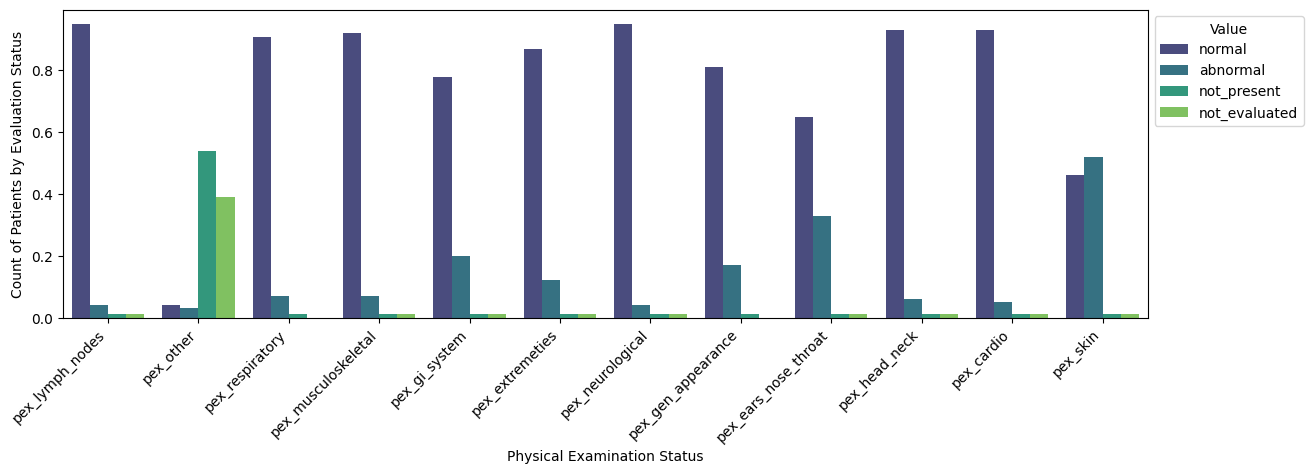

In [16]:
# visualize the pex_vc table
plt.figure(figsize=(14, 4))
sns.barplot(x='column', y='percentage', data=pex_vc, hue='value', palette='viridis')
plt.xticks(rotation=45, ha='right');
# move legend outside of plot
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Value')
plt.ylabel('Count of Patients by Evaluation Status')
plt.xlabel('Physical Examination Status');


Series created for each drug class:
can created with shape of: (7, 1)
coc created with shape of: (7, 1)
alc created with shape of: (7, 1)
oxy created with shape of: (7, 1)
mme created with shape of: (7, 1)
amp created with shape of: (7, 1)
met created with shape of: (7, 1)
opi created with shape of: (7, 1)
ben created with shape of: (7, 1)
pro created with shape of: (7, 1)
Series created for each drug class:

drug_tests Dataframe:  Positive test rate per drug class


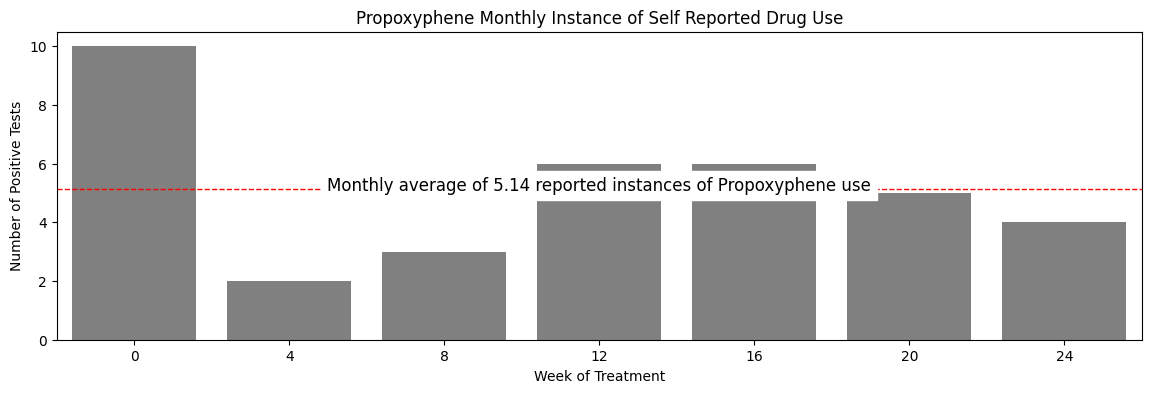

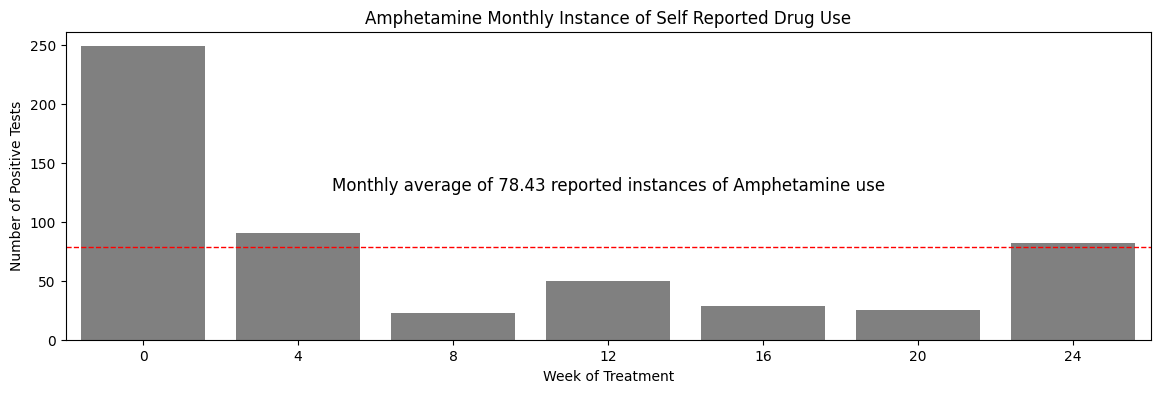

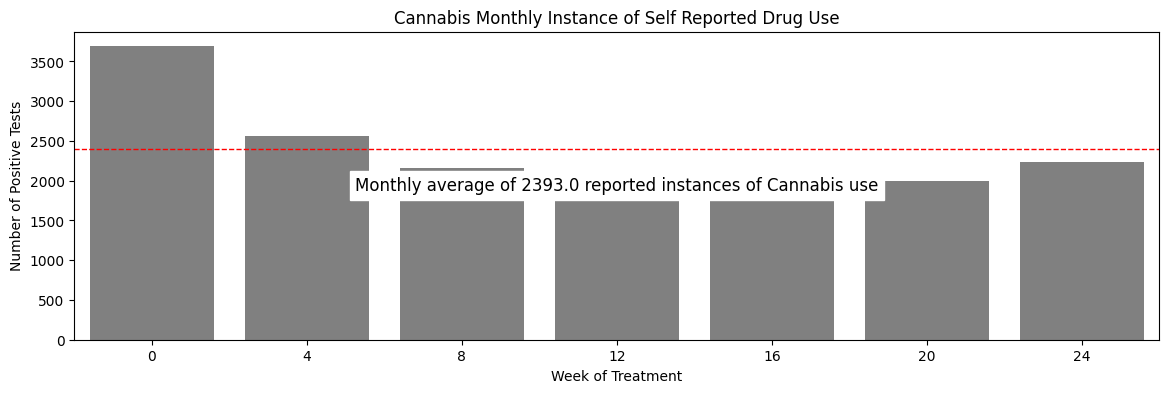

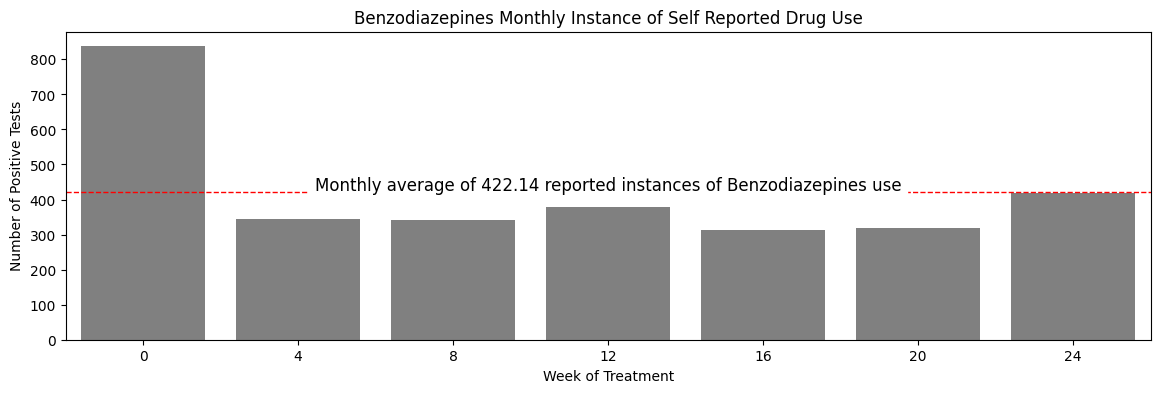

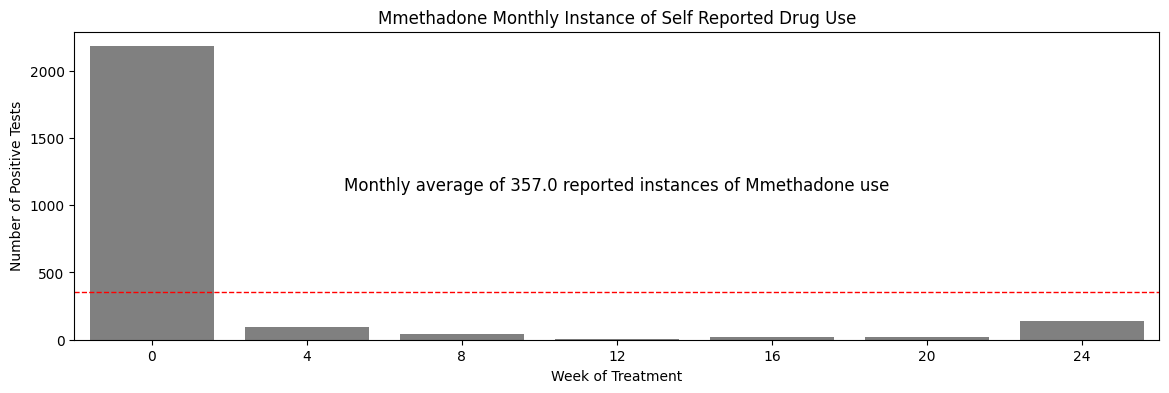

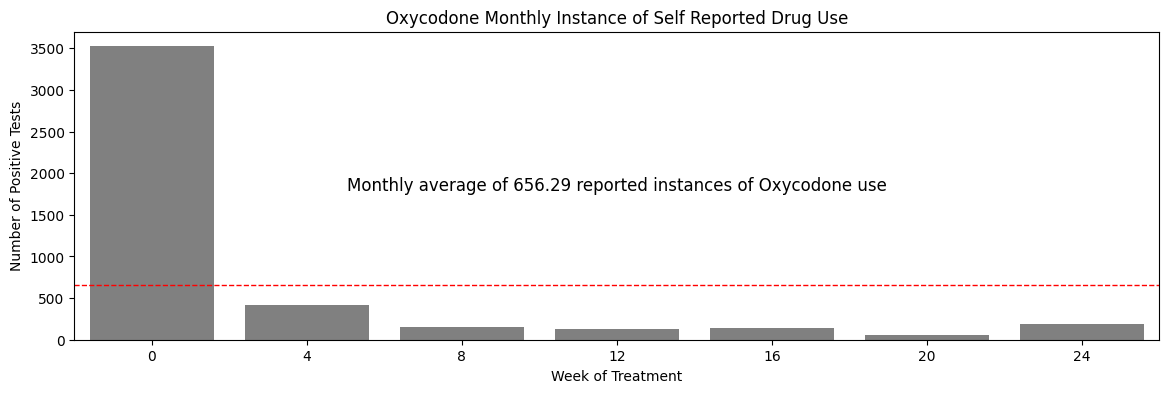

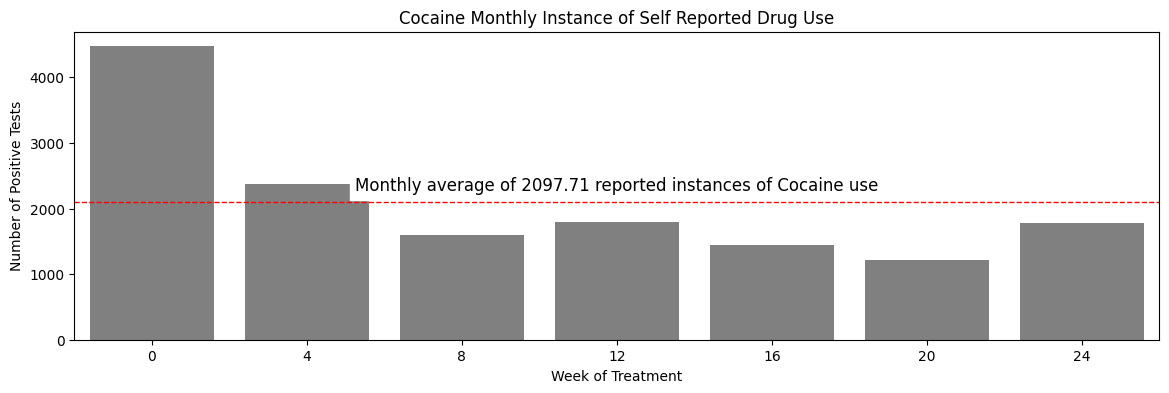

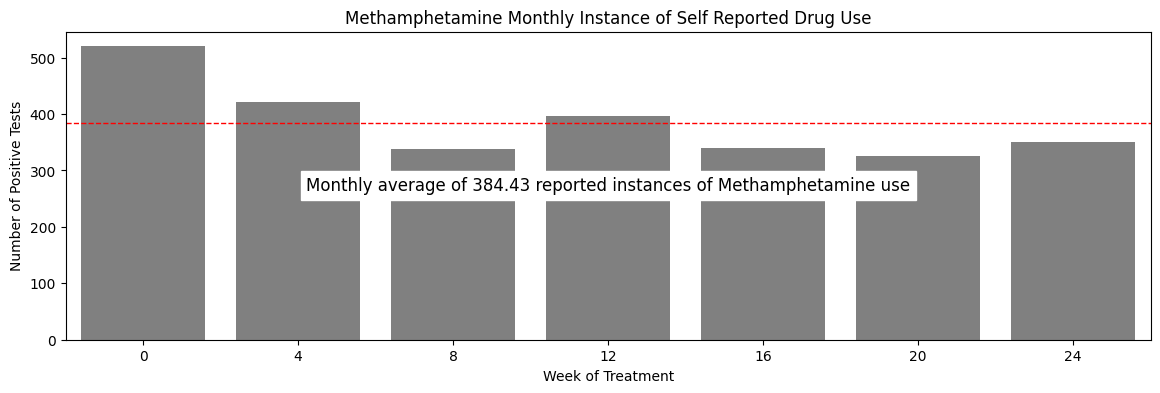

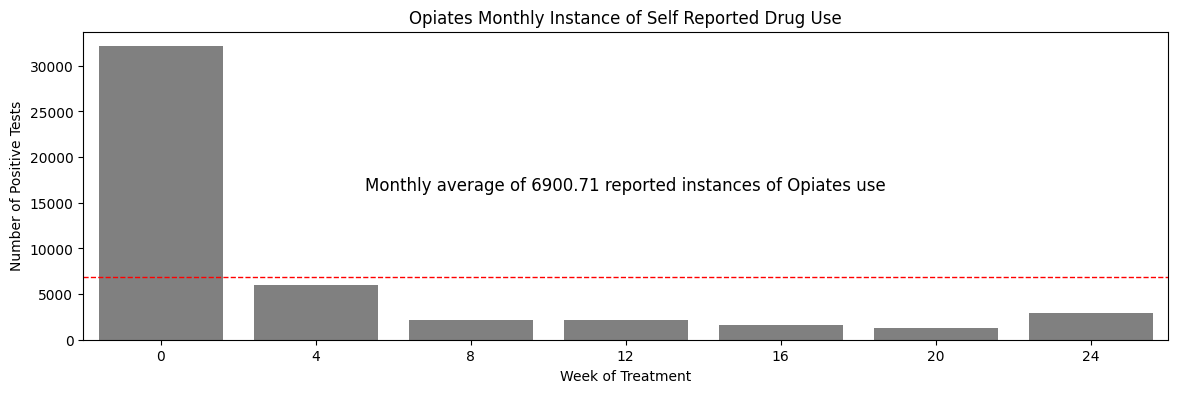

In [17]:
df, dict = helper.agg_weekly_data(data, group='survey_', agg='sum')

### clean the dose record
Dose Record: DOS<br>
Records the medication, averge weekly dose and week of treatment<br>
<br>


In [18]:
# create df for medication does
meds = data[[col for col in data.columns if col.startswith('meds_')]]

bupe = meds[[col for col in meds.columns if 'buprenorphine' in col]]

meth = meds[[col for col in meds.columns if 'methadone' in col]]

# Correct approach to modify column names
bupe.columns = [col.split('_')[-1] for col in bupe.columns]
meth.columns = [col.split('_')[-1] for col in meth.columns]

# create series and merge for plotting
bupe = bupe.mean().round(2).to_frame('buprenorphine')
meth = meth.mean().round(2).to_frame('methadone')

# merge
meds = pd.concat([bupe, meth], axis=1)



meds




,buprenorphine,methadone
0,12.06,28.74
1,55.94,124.71
2,57.58,156.17
3,51.46,156.91
4,55.63,176.91
5,49.82,173.64
6,47.32,176.50
7,45.21,182.06
8,47.16,188.98
9,41.29,185.54


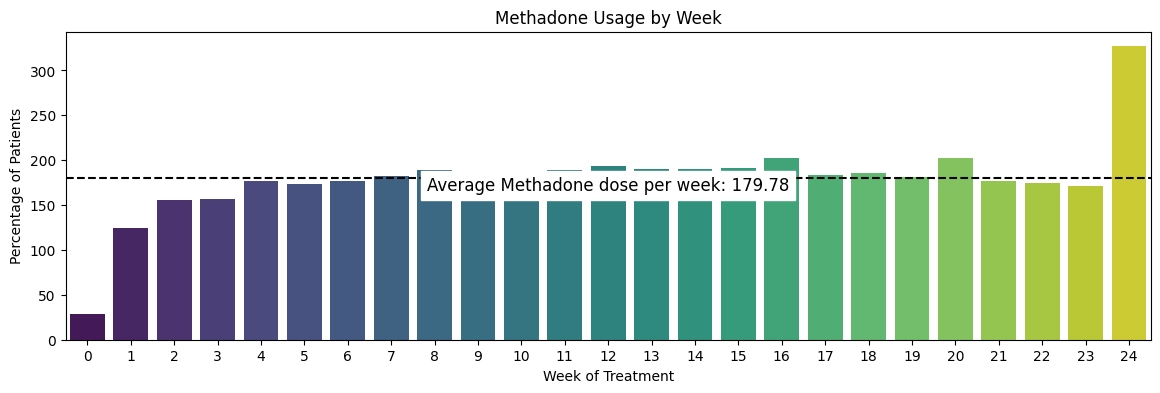

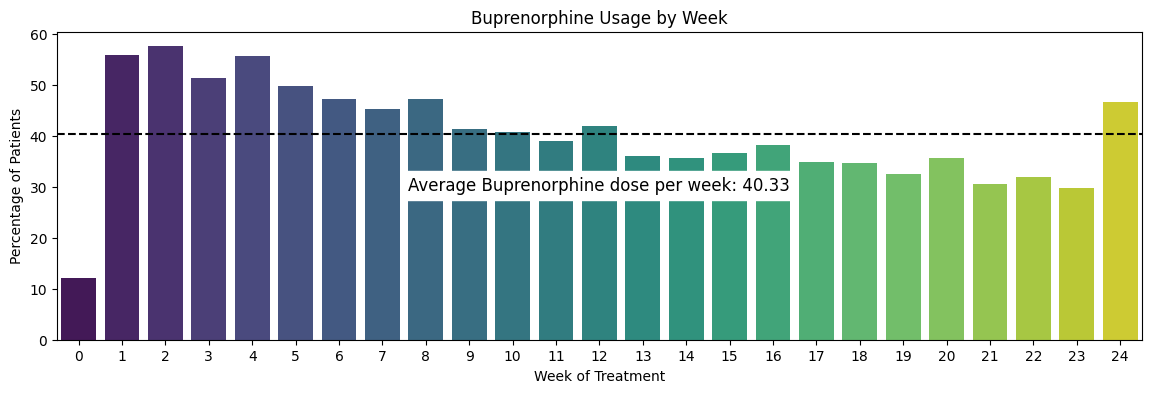

In [19]:
# set plot params
med_options = ['methadone', 'buprenorphine']
for i,med in enumerate(med_options):
    # create separate bar plot for each med
    plt.figure(figsize=(14, 4))
    sns.barplot(x=meds.index, y=meds[med], palette='viridis')
    plt.ylabel('Percentage of Patients')
    plt.xlabel('Week of Treatment')
    plt.title(f'{med.capitalize()} Usage by Week')
    plt.axhline(y=meds[med].mean(), color='black', linestyle='--', label=f'Average {med.capitalize()} Usage')
    plt.annotate(
        f"Average {med.capitalize()} dose per week: {meds[med].mean().round(2)}",
        xy=(0.5, 0.5),
        xycoords="axes fraction",
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        backgroundcolor='white'
    );

